In [1]:
import os
import cv2
import numpy as np

import random
from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
print("Built with CUDA: ", tf.test.is_built_with_cuda())

Built with CUDA:  True


In [4]:
print("GPU available:", tf.config.list_physical_devices('GPU'))

GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [6]:
!nvidia-smi

Mon Mar 10 23:07:13 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.16                 Driver Version: 572.16         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   47C    P4             10W /   44W |     672MiB /   8188MiB |     25%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
# taskkill /PID num /F

In [8]:
train_directory = r"C:\Users\15489\Desktop\RID\data\images_roof_centered_geotiff"
mask_seg_directory = r"C:\Users\15489\Desktop\RID\data\masks_segments_reviewed"
mask_seg_sup_directory=r"C:\Users\15489\Desktop\RID\data\masks_superstructures_reviewed"
test_directory=r"C:\Users\15489\Desktop\RID\data\images_annotation_experiment_geotiff"
 

In [9]:
train_dataset=[]
mask_seg_dataset=[]
mask_seg_sup_dataset=[]
test_dataset=[]

# *Data preprocessing*

In [10]:
# The trainning datasets of the RGB rooftop images

for path,subdirs,files in os.walk(train_directory):
    print(files)
    for i, image_name in enumerate(files):
        if image_name.endswith(".tif"):
            train_image = cv2.imread(os.path.join(path, image_name), cv2.IMREAD_COLOR)
            train_dataset.append(train_image)


['10.tif', '100.tif', '1000.tif', '1001.tif', '1002.tif', '1003.tif', '1004.tif', '1005.tif', '1006.tif', '1007.tif', '1008.tif', '1009.tif', '101.tif', '1010.tif', '1011.tif', '1012.tif', '1013.tif', '1014.tif', '1015.tif', '1016.tif', '1017.tif', '1018.tif', '1019.tif', '102.tif', '1020.tif', '1021.tif', '1022.tif', '1023.tif', '1024.tif', '1025.tif', '1026.tif', '1027.tif', '1028.tif', '1029.tif', '1031.tif', '1032.tif', '1033.tif', '1034.tif', '1035.tif', '1036.tif', '1037.tif', '1038.tif', '1039.tif', '104.tif', '1040.tif', '1041.tif', '1042.tif', '1043.tif', '1044.tif', '1045.tif', '1046.tif', '1047.tif', '1048.tif', '1049.tif', '105.tif', '1050.tif', '1051.tif', '1052.tif', '1053.tif', '1054.tif', '1055.tif', '1056.tif', '1057.tif', '1058.tif', '1059.tif', '106.tif', '1060.tif', '1061.tif', '1062.tif', '1063.tif', '1064.tif', '1065.tif', '1066.tif', '1067.tif', '1068.tif', '107.tif', '1070.tif', '1071.tif', '1072.tif', '1073.tif', '1074.tif', '1075.tif', '1076.tif', '1077.tif', 

In [11]:
# The mask of the rooftop  
for path,subdirs,files in os.walk(mask_seg_directory):
    print(files)
    for i, image_name in enumerate(files):
        if image_name.endswith(".png"):
            mask_seg_image = cv2.imread(os.path.join(path, image_name), cv2.IMREAD_GRAYSCALE)
            mask_seg_dataset.append(mask_seg_image)


['10.png', '100.png', '1000.png', '1001.png', '1002.png', '1003.png', '1004.png', '1005.png', '1006.png', '1007.png', '1008.png', '1009.png', '101.png', '1010.png', '1011.png', '1012.png', '1013.png', '1014.png', '1015.png', '1016.png', '1017.png', '1018.png', '1019.png', '102.png', '1020.png', '1021.png', '1022.png', '1023.png', '1024.png', '1025.png', '1026.png', '1027.png', '1028.png', '1029.png', '1031.png', '1032.png', '1033.png', '1034.png', '1035.png', '1036.png', '1037.png', '1038.png', '1039.png', '104.png', '1040.png', '1041.png', '1042.png', '1043.png', '1044.png', '1045.png', '1046.png', '1047.png', '1048.png', '1049.png', '105.png', '1050.png', '1051.png', '1052.png', '1053.png', '1054.png', '1055.png', '1056.png', '1057.png', '1058.png', '1059.png', '106.png', '1060.png', '1061.png', '1062.png', '1063.png', '1064.png', '1065.png', '1066.png', '1067.png', '1068.png', '107.png', '1070.png', '1071.png', '1072.png', '1073.png', '1074.png', '1075.png', '1076.png', '1077.png', 

In [12]:
# The superstructures of the rooftop
for path,subdirs,files in os.walk(mask_seg_sup_directory):
    print(files)
    for i, image_name in enumerate(files):
        if image_name.endswith(".png"):
            mask_seg_sup_image = cv2.imread(os.path.join(path, image_name), cv2.IMREAD_GRAYSCALE)
            mask_seg_sup_dataset.append(mask_seg_sup_image)


['10.png', '100.png', '1000.png', '1001.png', '1002.png', '1003.png', '1004.png', '1005.png', '1006.png', '1007.png', '1008.png', '1009.png', '101.png', '1010.png', '1011.png', '1012.png', '1013.png', '1014.png', '1015.png', '1016.png', '1017.png', '1018.png', '1019.png', '102.png', '1020.png', '1021.png', '1022.png', '1023.png', '1024.png', '1025.png', '1026.png', '1027.png', '1028.png', '1029.png', '1031.png', '1032.png', '1033.png', '1034.png', '1035.png', '1036.png', '1037.png', '1038.png', '1039.png', '104.png', '1040.png', '1041.png', '1042.png', '1043.png', '1044.png', '1045.png', '1046.png', '1047.png', '1048.png', '1049.png', '105.png', '1050.png', '1051.png', '1052.png', '1053.png', '1054.png', '1055.png', '1056.png', '1057.png', '1058.png', '1059.png', '106.png', '1060.png', '1061.png', '1062.png', '1063.png', '1064.png', '1065.png', '1066.png', '1067.png', '1068.png', '107.png', '1070.png', '1071.png', '1072.png', '1073.png', '1074.png', '1075.png', '1076.png', '1077.png', 

In [13]:
# The RGB rooftop images for testing sets
for path,subdirs,files in os.walk(test_directory):
    print(files)
    for i, image_name in enumerate(files):
        if image_name.endswith(".tif"):
            test_image = cv2.imread(os.path.join(path, image_name), cv2.IMREAD_COLOR)
            test_dataset.append(test_image)


['1011.tif', '1055.tif', '1063.tif', '1110.tif', '1145.tif', '1186.tif', '1246.tif', '1362.tif', '1439.tif', '1529.tif', '1556.tif', '1600.tif', '2060.tif', '391.tif', '453.tif', '61.tif', '640.tif', '694.tif', '700.tif', '77.tif', '811.tif', '846.tif', '880.tif', '9.tif', '941.tif', '990.tif']


In [14]:
train_dataset=(np.array(train_dataset))
test_dataset=np.array(test_dataset)
mask_seg_dataset=np.array(mask_seg_dataset)
mask_seg_sup_dataset=np.array(mask_seg_sup_dataset)

*Because my gpu memory is 8Gb, when I train the model, it will meet OOM(out of memory) problem, so I decided to cut down the image from 512x512 to 256x256.*

In [15]:

new_size = (256, 256)
mask_seg_resized_dataset=[]
train_resized_dataset=[]
test_resized_dataset=[]

mask_sup_resized_dataset=[]

# X rooftop train image resized  256 256
Xtrain_resized = np.zeros((train_dataset.shape[0], new_size[1], new_size[0], train_dataset.shape[3]), dtype=train_dataset.dtype)
for i in range(train_dataset.shape[0]):
    Xtrain_resized[i] = cv2.resize(train_dataset[i], new_size, interpolation=cv2.INTER_AREA)
    train_resized_dataset.append(Xtrain_resized[i])


# X rooftop test image resized 256 256
test_resized = np.zeros((test_dataset.shape[0], new_size[1], new_size[0], test_dataset.shape[3]), dtype=train_dataset.dtype)
for i in range(test_dataset.shape[0]):
    test_resized[i] = cv2.resize(test_dataset[i], new_size, interpolation=cv2.INTER_AREA)
    test_resized_dataset.append(test_resized[i])


# y_train only with the mask of rooftop resized 256 256
mask_seg_train_resized = np.zeros((mask_seg_dataset.shape[0], new_size[1], new_size[0]), dtype=np.uint8)
for i in range(mask_seg_dataset.shape[0]):
    mask_seg_train_resized[i] = cv2.resize(mask_seg_dataset[i], new_size, interpolation=cv2.INTER_NEAREST)
    mask_seg_resized_dataset.append(mask_seg_train_resized[i])

# New training datasets for rooftop supersturctures segmentation only
mask_sup_train_resized = np.zeros((mask_seg_sup_dataset.shape[0], new_size[1], new_size[0]), dtype=np.uint8)
for i in range(mask_seg_sup_dataset.shape[0]):
    mask_sup_train_resized[i] = cv2.resize(mask_seg_sup_dataset[i], new_size, interpolation=cv2.INTER_NEAREST)
    mask_sup_resized_dataset.append(mask_sup_train_resized[i])

print("New X_train shape for rooftop segmentation only:", np.array(train_resized_dataset).shape)
print("New y_train shape for rooftop segmentation only:", np.array(mask_seg_train_resized).shape)
print("New x_test shape for rooftop segmentation only:", np.array(test_resized_dataset).shape)
print("New training datasets for rooftop supersturctures segmentation only:",np.array(mask_sup_resized_dataset).shape)


New X_train shape for rooftop segmentation only: (1880, 256, 256, 3)
New y_train shape for rooftop segmentation only: (1880, 256, 256)
New x_test shape for rooftop segmentation only: (26, 256, 256, 3)
New training datasets for rooftop supersturctures segmentation only: (1880, 256, 256)


Text(0.5, 1.0, 'Resized rooftop superstructures')

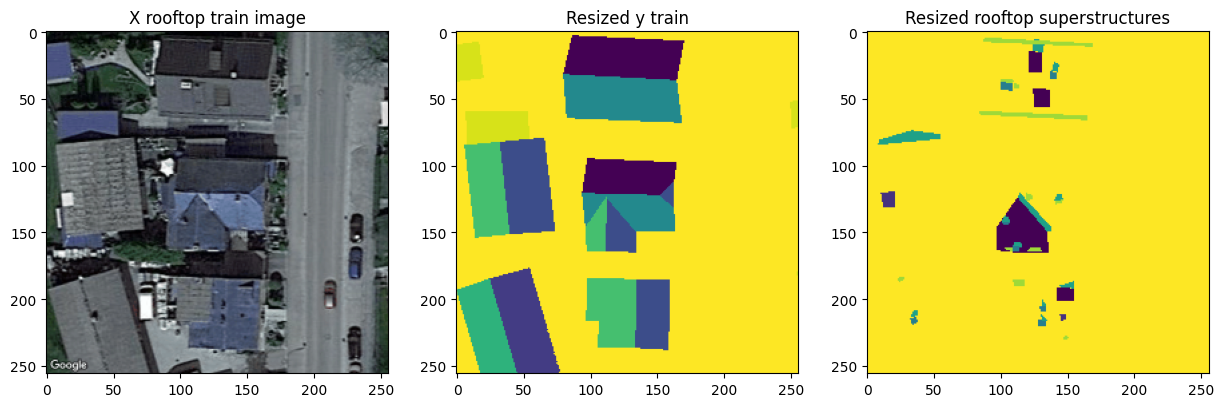

In [16]:
ix = np.random.randint(0, len(train_resized_dataset))

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(train_resized_dataset[ix])
plt.title("X rooftop train image")
plt.subplot(132)
plt.imshow(mask_seg_train_resized[ix])
plt.title("Resized y train")
plt.subplot(133)
plt.imshow(mask_sup_resized_dataset[ix])
plt.title("Resized rooftop superstructures")

In [17]:
train_dataset = np.array(train_resized_dataset)
mask_seg_dataset = np.array(mask_seg_train_resized)
test_dataset=np.array(test_resized_dataset)
mask_sup_resized_dataset=np.array(mask_sup_resized_dataset)


In [18]:
#The dataset shape
print("The input datasets shape:",train_dataset.shape)

print("The y training datasets shape for only the rooftop:",mask_seg_dataset.shape)
print("The y training datasets shape after removing the superstructures:",mask_sup_resized_dataset.shape)
print("The testing datasets shape",test_dataset.shape)

The input datasets shape: (1880, 256, 256, 3)
The y training datasets shape for only the rooftop: (1880, 256, 256)
The y training datasets shape after removing the superstructures: (1880, 256, 256)
The testing datasets shape (26, 256, 256, 3)


In [19]:
# Change 3 channels into single channel

In [20]:
print("Mask Segmentation with unique values:", np.unique(mask_seg_dataset))
print("Mask Segmentation only with superstructure with unique values:",np.unique(mask_sup_resized_dataset))

# print("Mask Segmentation only with superstructure with unique values:",np.unique(mask_seg_sup_dataset))

Mask Segmentation with unique values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Mask Segmentation only with superstructure with unique values: [0 1 2 3 4 5 6 7 8]


In [21]:
mask_seg_dataset = (mask_seg_dataset != 17)
mask_sup_resized_dataset = (mask_sup_resized_dataset != 8)
# # y_train_final: the datasets for segmentation of the rooftop after removing the superstructures #*************************#
Final_dataset = ((mask_seg_dataset == True) & (mask_sup_resized_dataset == False))



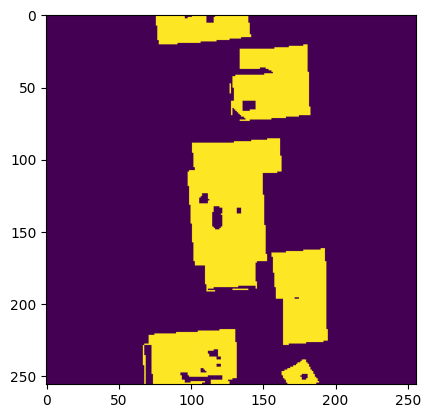

In [22]:
plt.imshow(Final_dataset[2])

Text(0.5, 1.0, 'Final y_train images')

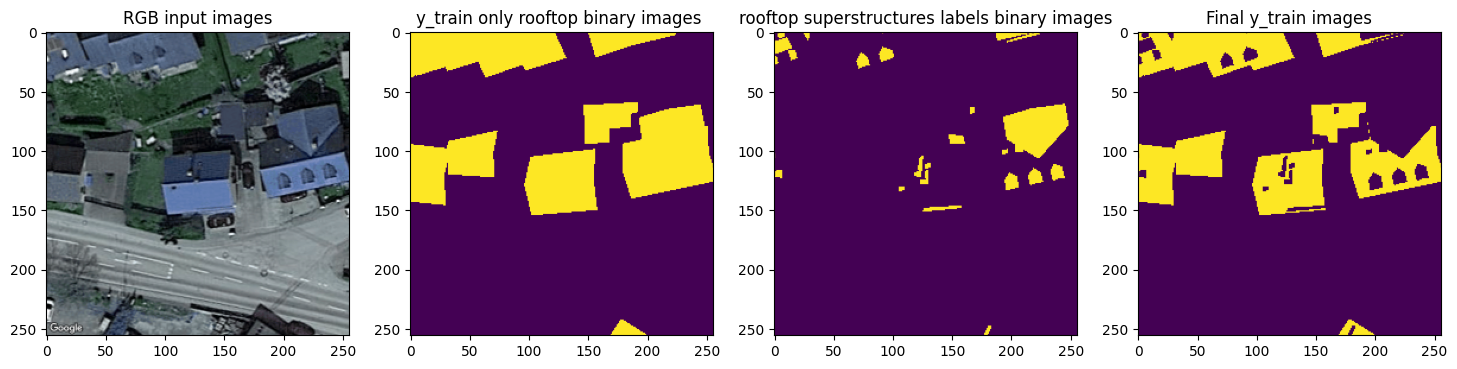

In [23]:
import random
from matplotlib import pyplot as plt
image_number = random.randint(0,len(train_dataset))
plt.figure(figsize=(18,12))
plt.subplot(141)
plt.imshow(train_dataset[image_number])
plt.title("RGB input images")
plt.subplot(142)
plt.imshow(mask_seg_dataset[image_number])
plt.title("y_train only rooftop binary images ")
plt.subplot(143)
plt.imshow(mask_sup_resized_dataset[image_number])
plt.title("rooftop superstructures labels binary images")
plt.subplot(144)
plt.imshow(Final_dataset[image_number])
plt.title("Final y_train images")



In [24]:
train_dataset.shape

(1880, 256, 256, 3)

In [25]:
mask_seg_dataset.shape


(1880, 256, 256)

In [26]:
n_classes=len(np.unique(mask_seg_dataset))

In [27]:
n_classes

2

In [28]:
labels=mask_seg_dataset # Y_train astype:bool

In [29]:
labels.shape

(1880, 256, 256)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(train_dataset,labels,test_size=0.2,random_state=42)
print(y_train)

[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ...  True  True  True]
  [False False False ...  True  True  True]
  [False False False ...  True  True  True]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ...  True  True  True]
  [False False False ...  True  True  True]
  [False False False ...  True  True  True]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [ True  True  True ... False False Fal

In [31]:
y_train.shape

(1504, 256, 256)

In [32]:
print(X_train)

[[[[129 140 139]
   [106 116 115]
   [ 79  90  88]
   ...
   [110 118 118]
   [110 118 118]
   [110 118 118]]

  [[ 81  95  93]
   [ 39  50  46]
   [ 17  26  21]
   ...
   [110 118 118]
   [110 118 118]
   [110 118 118]]

  [[ 22  30  28]
   [ 17  21  21]
   [ 11  17  16]
   ...
   [110 118 118]
   [112 120 120]
   [111 119 119]]

  ...

  [[ 44  49  49]
   [ 45  46  46]
   [ 42  45  45]
   ...
   [ 96 102 100]
   [ 66  72  72]
   [ 61  66  65]]

  [[ 40  39  39]
   [ 29  29  29]
   [ 25  23  23]
   ...
   [ 72  78  78]
   [ 53  56  57]
   [ 56  59  59]]

  [[ 36  36  36]
   [ 28  26  26]
   [ 22  18  18]
   ...
   [ 78  88  88]
   [ 77  88  88]
   [ 78  86  86]]]


 [[[ 25  34  48]
   [ 33  45  59]
   [ 43  51  69]
   ...
   [  7  11  14]
   [  6  10  14]
   [ 10  13  18]]

  [[ 29  35  52]
   [ 26  37  50]
   [ 26  37  50]
   ...
   [  7  14  14]
   [ 12  17  19]
   [ 15  18  22]]

  [[ 35  49  67]
   [ 40  51  71]
   [ 43  53  73]
   ...
   [  6  17  13]
   [ 12  18  20]
   [  8  12

In [33]:
IMAGE_HEIGHT= X_train.shape[1]
IMAGE_WIDTH = X_train.shape[2]
IMAGE_CHANNELS= X_train.shape[3]

In [34]:
X_train.shape

(1504, 256, 256, 3)

In [35]:
IMAGE_CHANNELS

3

In [36]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization,Dropout, Lambda
from keras import backend as K

In [37]:
# def jacard_coef(y_true, y_pred):
#     y_true_f = K.flatten(y_true)
#     y_pred_f = K.flatten(y_pred)
#     intersection = K.sum(y_true_f * y_pred_f)
#     return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

In [38]:
def multi_unet_model(n_classes,IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    # s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.2)(c1)  # Original 0.1
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.2)(c2)  # Original 0.1
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.2)(c8)  # Original 0.1
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.2)(c9)  # Original 0.1
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(n_classes, (1, 1), activation='sigmoid')(c9) # change from softmax to sigmoid, because sigmoid is used especially in this binary catogory
                                                                  # The n_classes actually means the image channel(be careful) 
     
    model = Model(inputs=[inputs], outputs=[outputs])
    
    #NOTE: Compile the model in the main program to make it easy to test with various loss functions
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    #model.summary()
    
    return model

In [39]:
metrics=['accuracy']

In [40]:
def get_model():
    return multi_unet_model(n_classes=1, IMG_HEIGHT=IMAGE_HEIGHT, IMG_WIDTH=IMAGE_WIDTH, IMG_CHANNELS=IMAGE_CHANNELS)

Unet_model1 = get_model()
Unet_model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)
Unet_model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [41]:
Unet_model1.output.shape


TensorShape([None, 256, 256, 1])

In [42]:
Unet_model1.input.shape

TensorShape([None, 256, 256, 3])

In [43]:
print("X_train shape:", X_train.shape, "X_train dtype:", X_train.dtype)
print("y_train shape:", y_train.shape, "y_train dtype:", y_train.dtype)
print("X_test shape:", X_test.shape, "X_test dtype:", X_test.dtype)
print("y_test shape:", y_test.shape, "y_test dtype:", y_test.dtype)

X_train shape: (1504, 256, 256, 3) X_train dtype: uint8
y_train shape: (1504, 256, 256) y_train dtype: bool
X_test shape: (376, 256, 256, 3) X_test dtype: uint8
y_test shape: (376, 256, 256) y_test dtype: bool


# *Unet model compiling for segmentation of the rooftop only*

In [44]:
# modelcheckpointer=tf.keras.callbacks.ModelCheckpoint(r"C:\vscodeproject\Python\EE981_Unet_model\unet_model1_callback.h5", verbose=1, save_best_only=True) 

# callbacks = [
#     tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
#     tf.keras.callbacks.TensorBoard(log_dir='logs')]



# history1 = Unet_model1.fit(X_train, y_train, 
#                     batch_size = 10, 
#                     verbose=1, 
#                     epochs=25,
#                     callbacks=[callbacks, modelcheckpointer],
#                     validation_data=(X_test, y_test), 
#                     shuffle=False)

*Considering it is too time-consuming to train the model each time, i just save the model in unet_model1_callback.h5 this file in order to save time after i compiled it once.*

In [45]:
# Unet_model1.save(r"C:\vscodeproject\Python\EE981_Unet_model\unet_model1.h5") 

In [46]:

Unet_model1 = tf.keras.models.load_model(
    r"C:\vscodeproject\Python\EE981_Unet_model\unet_model1_callback.h5"
)

## *Visualisation of the images*

In [47]:
val_start = int(X_train.shape[0] * 0.9)
X_val = X_train[val_start:]  # 形状为 (150, 256, 256, 3)
print("Validation set shape:", X_val.shape)
preds_val = Unet_model1.predict(X_val, verbose=1)

Validation set shape: (151, 256, 256, 3)
5/5 [==============================] - 15s 746ms/step


In [48]:
ooo=X_train[int(X_train.shape[0]*0.9)]
print(ooo.shape)
bbb=X_train[:int(X_train.shape[0]*0.9)]
print(bbb.shape)

(256, 256, 3)
(1353, 256, 256, 3)


12/12 [==============================] - 4s 382ms/step


Text(0.5, 1.0, 'Train Prediction')

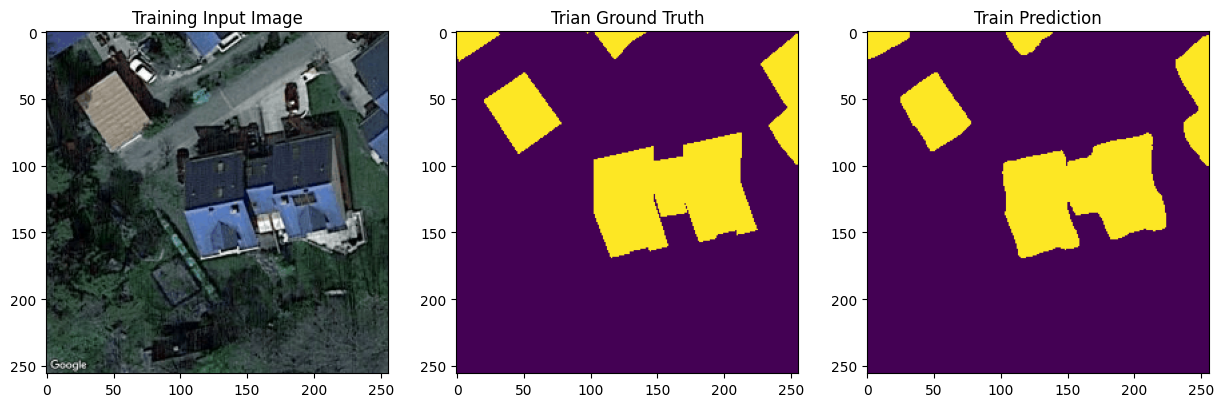

In [49]:
import numpy as np

idx= random.randint(0,len(X_train))

preds_train= Unet_model1.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val= Unet_model1.predict(X_val, verbose=1)
preds_test= Unet_model1.predict(X_test, verbose=1)

preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(X_train[idx])
plt.title('Training Input Image')

plt.subplot(132)
plt.imshow(np.squeeze(y_train[idx]))
plt.title('Trian Ground Truth')

plt.subplot(133)
plt.imshow(np.squeeze(preds_train_t[idx]))
plt.title('Train Prediction')



Text(0.5, 1.0, 'Val predicted image')

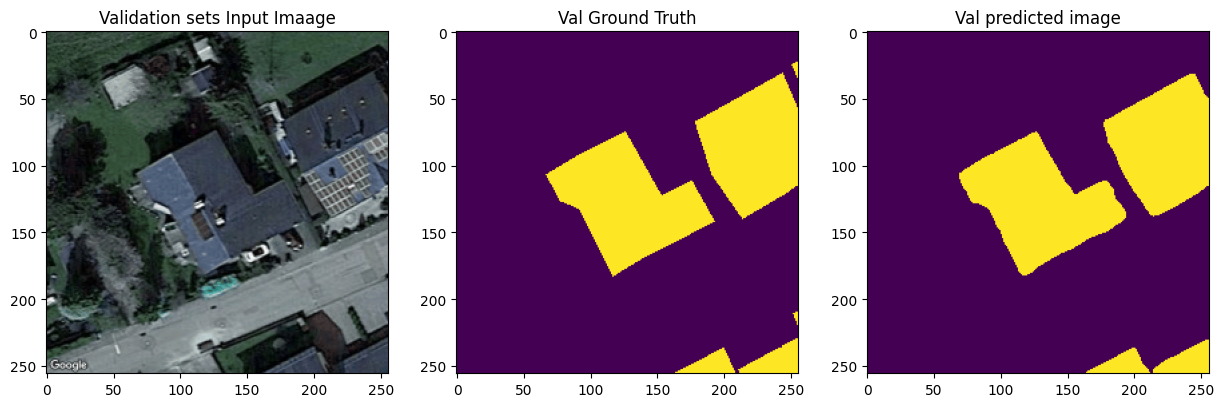

In [50]:
# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(X_train[int(X_train.shape[0]*0.9):][ix]) #watch there is a : here!!
plt.title('Validation sets Input Imaage')

plt.subplot(132)
plt.imshow(np.squeeze(y_train[int(y_train.shape[0]*0.9):][ix]))
plt.title('Val Ground Truth')

plt.subplot(133)
plt.imshow(np.squeeze(preds_val_t[ix]))
plt.title('Val predicted image')


# *Training Model2*

*y_train= Final_dataset(which is the masks that remove the superstructures also include the rooftops)*

In [51]:
labels=Final_dataset
print(labels.shape)

(1880, 256, 256)


*First, visulisation the datasets*

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(train_dataset,labels,test_size=0.2,random_state=42)
print(y_train.shape)

(1504, 256, 256)


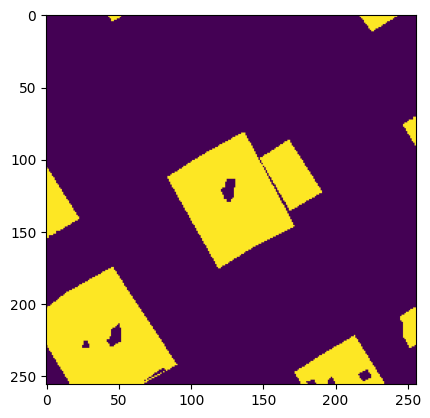

In [53]:
plt.imshow(y_train[2]) # Just make sure before we diving into training the model

In [54]:
Unet_model2 = get_model()
Unet_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)
Unet_model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_1 (Lambda)              (None, 256, 256, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 256, 256, 16  448         ['lambda_1[0][0]']               
                                )                                                                 
                                                                                            

In [55]:
print(Unet_model2.output_shape)
print(Unet_model2.input_shape)

(None, 256, 256, 1)
(None, 256, 256, 3)


In [56]:
modelcheckpointer=tf.keras.callbacks.ModelCheckpoint(r"C:\vscodeproject\Python\EE981_Unet_model\unet_model2_callback.h5", verbose=1, save_best_only=True) 

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs')]



history2 = Unet_model2.fit(X_train, y_train, 
                    batch_size = 10, 
                    verbose=1, 
                    epochs=25,
                    callbacks=[callbacks, modelcheckpointer],
                    validation_data=(X_test, y_test), 
                    shuffle=False)

Epoch 1/25
151/151 [==============================] - ETA: 0s - loss: 0.3916 - accuracy: 0.8242
Epoch 1: val_loss improved from inf to 0.34592, saving model to C:\vscodeproject\Python\EE981_Unet_model\unet_model2_callback.h5
151/151 [==============================] - 32s 164ms/step - loss: 0.3916 - accuracy: 0.8242 - val_loss: 0.3459 - val_accuracy: 0.8173
Epoch 2/25
151/151 [==============================] - ETA: 0s - loss: 0.2502 - accuracy: 0.9003
Epoch 2: val_loss improved from 0.34592 to 0.24605, saving model to C:\vscodeproject\Python\EE981_Unet_model\unet_model2_callback.h5
151/151 [==============================] - 21s 137ms/step - loss: 0.2502 - accuracy: 0.9003 - val_loss: 0.2460 - val_accuracy: 0.8990
Epoch 3/25
151/151 [==============================] - ETA: 0s - loss: 0.2212 - accuracy: 0.9142
Epoch 3: val_loss did not improve from 0.24605
151/151 [==============================] - 21s 136ms/step - loss: 0.2212 - accuracy: 0.9142 - val_loss: 0.3315 - val_accuracy: 0.8261
E

In [57]:

Unet_model2 = tf.keras.models.load_model(
    r"C:\vscodeproject\Python\EE981_Unet_model\unet_model2_callback.h5"
)

In [58]:
!nvidia-smi

Mon Mar 10 23:12:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.16                 Driver Version: 572.16         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   63C    P4             20W /   34W |    6893MiB /   8188MiB |     95%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [59]:
val_start = int(X_train.shape[0] * 0.9)
X_val = X_train[val_start:]  # 形状为 (150, 256, 256, 3)
print("Validation set shape:", X_val.shape)
preds_val = Unet_model2.predict(X_val, verbose=1)

Validation set shape: (151, 256, 256, 3)
5/5 [==============================] - 1s 128ms/step


12/12 [==============================] - 1s 118ms/step


Text(0.5, 1.0, 'Train Prediction')

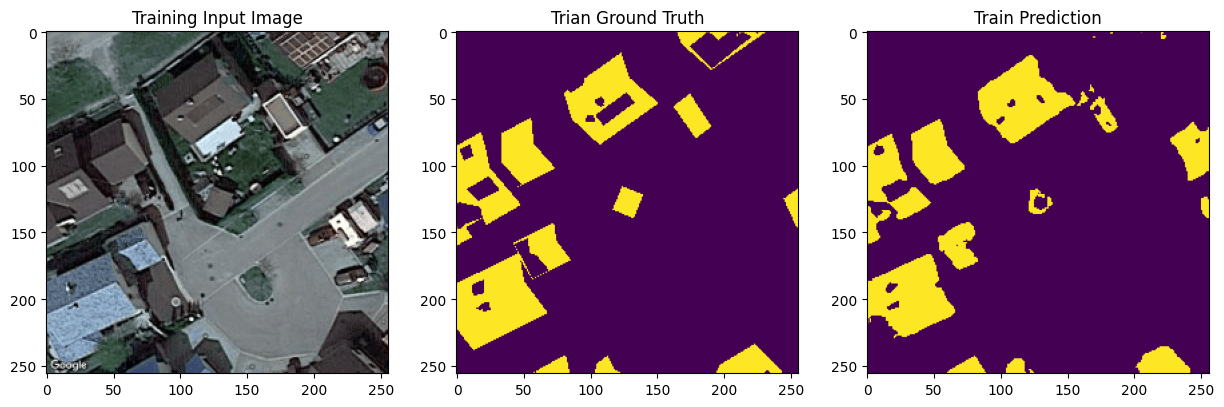

In [60]:
import numpy as np

idx= random.randint(0,len(X_train))

preds_train= Unet_model2.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val= Unet_model2.predict(X_val, verbose=1)
preds_test= Unet_model2.predict(X_test, verbose=1)

preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(X_train[idx])
plt.title('Training Input Image')

plt.subplot(132)
plt.imshow(np.squeeze(y_train[idx]))
plt.title('Trian Ground Truth')

plt.subplot(133)
plt.imshow(np.squeeze(preds_train_t[idx]))
plt.title('Train Prediction')



Text(0.5, 1.0, 'Val predicted image')

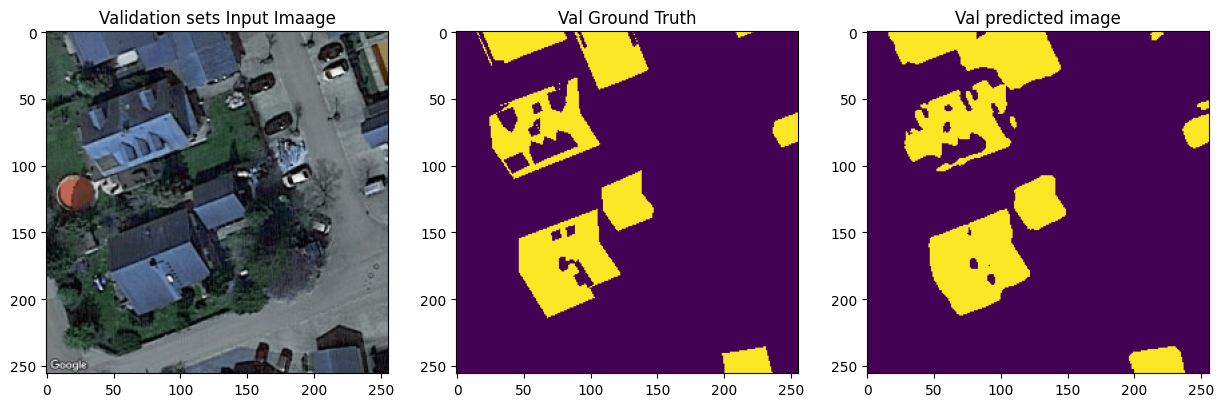

In [61]:
# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(X_train[int(X_train.shape[0]*0.9):][ix]) #watch there is a : here!!
plt.title('Validation sets Input Imaage')

plt.subplot(132)
plt.imshow(np.squeeze(y_train[int(y_train.shape[0]*0.9):][ix]))
plt.title('Val Ground Truth')

plt.subplot(133)
plt.imshow(np.squeeze(preds_val_t[ix]))
plt.title('Val predicted image')
